# HR - Employee Attrition

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.naive_bayes import GaussianNB   
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

**Uploading the data**

In [2]:
hrdf = pd.read_csv('DS2_C5_S4_HR_Data_Challenge.csv')

In [3]:
hrdf

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
hrdf.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
# no null values

In [6]:
hrdf.duplicated().sum()

3008

In [7]:
# 3008 duplicates have been found

In [8]:
hr_df = hrdf.drop_duplicates()

In [9]:
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [10]:
hr_df.duplicated().sum()

0

In [11]:
# no duplicates

In [12]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [13]:
# checking for outliers

<AxesSubplot:xlabel='satisfaction_level'>

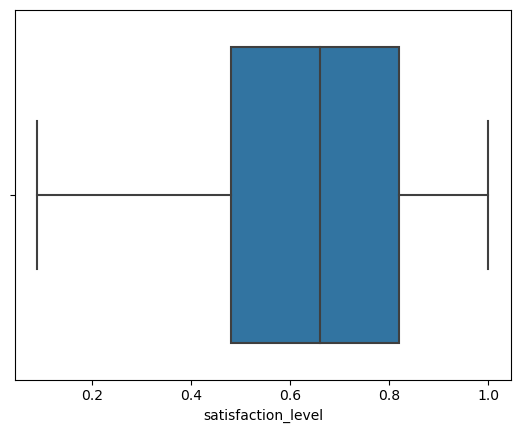

In [14]:
sns.boxplot(hr_df['satisfaction_level'])

<AxesSubplot:xlabel='last_evaluation'>

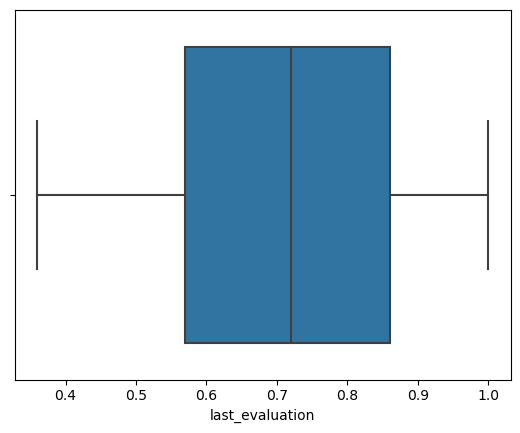

In [15]:
sns.boxplot(hr_df['last_evaluation'])

<AxesSubplot:xlabel='number_project'>

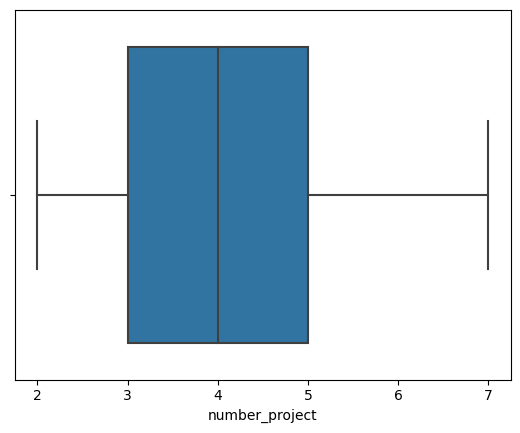

In [16]:
sns.boxplot(hr_df['number_project'])

<AxesSubplot:xlabel='time_spend_company'>

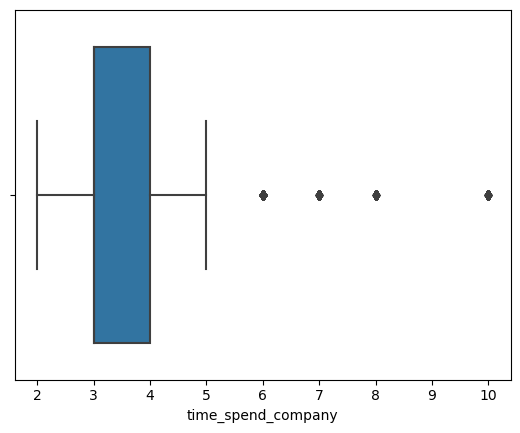

In [17]:
sns.boxplot(hr_df['time_spend_company'])

In [18]:
iqr=hr_df['time_spend_company'].quantile(0.75)-hr_df['time_spend_company'].quantile(0.25)
lf=hr_df['time_spend_company'].quantile(0.25)-1.5*iqr
uf=hr_df['time_spend_company'].quantile(0.75)+1.5*iqr
hr_df=hr_df[(hr_df['time_spend_company']>lf) & (hr_df['time_spend_company']<uf)]  

<AxesSubplot:xlabel='time_spend_company'>

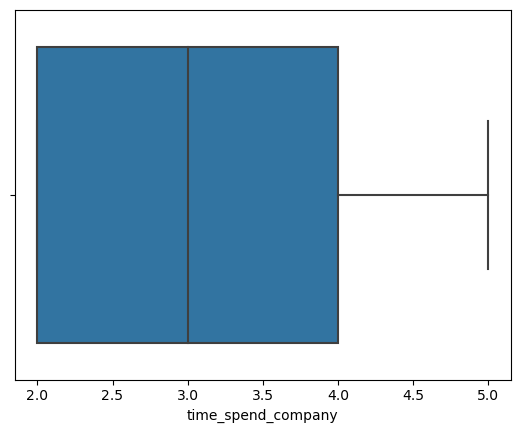

In [19]:
sns.boxplot(hr_df['time_spend_company'])

**Outliers have been treated**

# Task 1

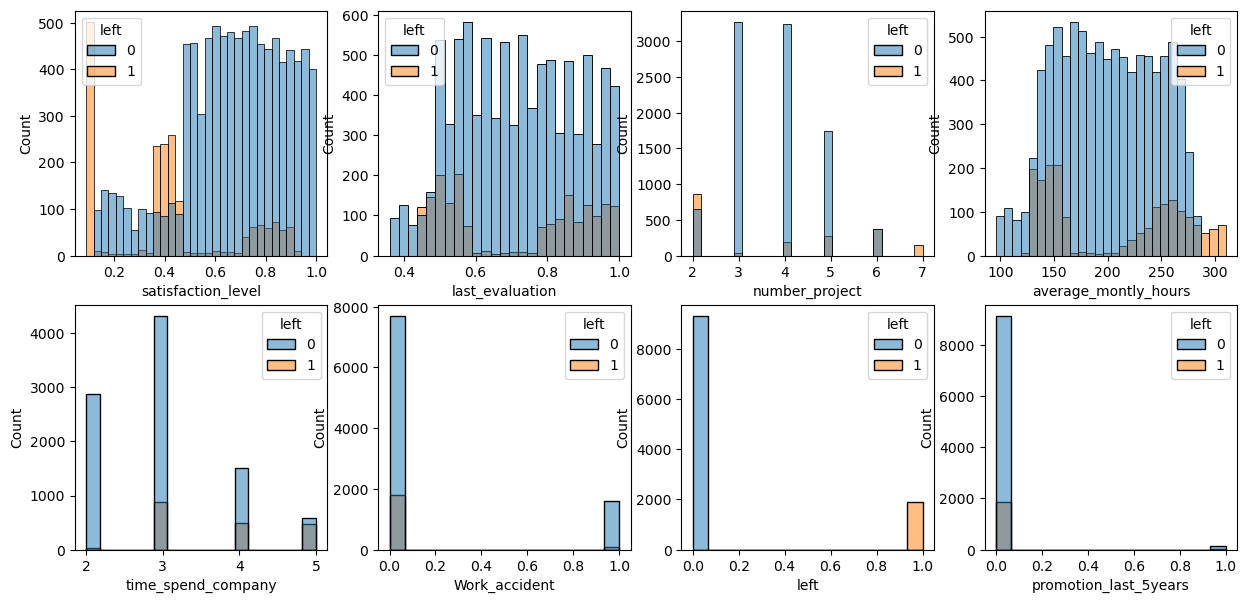

In [20]:
num_col = hr_df.select_dtypes(["int64","float64"])

fig,axs=plt.subplots(2,4,figsize=(15,7))
axs=axs.ravel()

count=0
for i in num_col:
    sns.histplot(x=i,hue='left',data=hr_df,ax=axs[count])
    count+=1

In [21]:
# those who have less satisfaction levels are the one's to leave the company
# those who have least no. of projects are the highest level of attrition or leave the company
# with average monthly hours between 110-160 have attrition
# the time spent in the company bteween 3 to 5 yrs have high attrition 
# those who have no promotion in the last 5 years have attrition

<AxesSubplot:xlabel='salary', ylabel='count'>

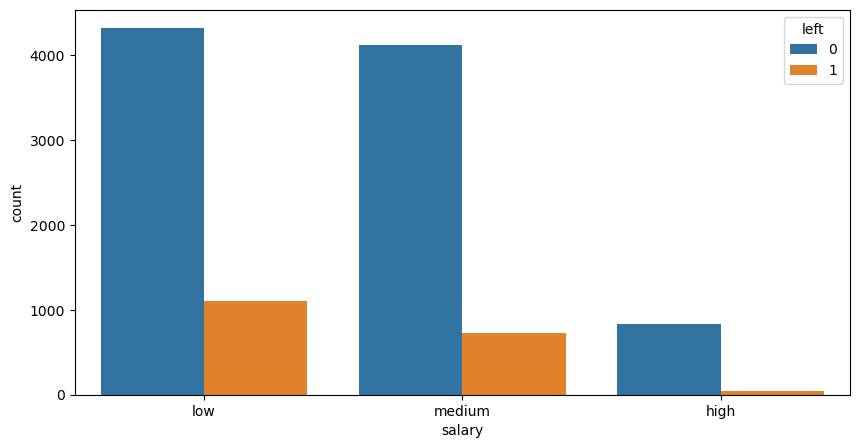

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x="salary",hue="left",data=hr_df)

In [23]:
# one's who have low salary have a high attrition

<AxesSubplot:xlabel='Department', ylabel='count'>

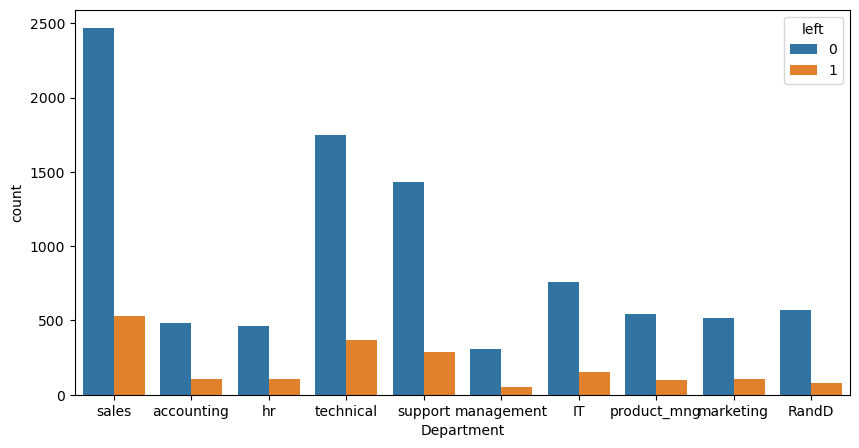

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x="Department",hue="left",data=hr_df)

In [25]:
# From the Sales department max . people left the comapny 
# from technical and Support department were followed

# Task 2

In [26]:
# converting cat to numerical for salary and department

In [28]:
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
5,0.41,0.50,2,153,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,7,2
11986,0.48,0.50,5,142,4,0,0,0,0,2
11987,0.19,0.79,4,229,4,0,0,0,6,2
11992,0.62,0.85,3,237,3,1,0,0,0,2


In [29]:
corr_mat = hr_df.corr()

In [30]:
corr_mat

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.095493,-0.132528,-0.011639,-0.221398,0.044463,-0.400050,0.025885,0.002914,0.002312
last_evaluation,0.095493,1.000000,0.280385,0.267207,0.138083,0.001510,-0.013313,-0.001794,0.001581,0.003779
number_project,-0.132528,0.280385,1.000000,0.344915,0.257721,-0.004256,0.021499,0.005449,0.008275,0.003500
average_montly_hours,-0.011639,0.267207,0.344915,1.000000,0.145442,-0.007455,0.056267,-0.008760,-0.000952,0.003680
time_spend_company,-0.221398,0.138083,0.257721,0.145442,1.000000,-0.030974,0.325233,-0.010505,-0.007962,0.009860
Work_accident,0.044463,0.001510,-0.004256,-0.007455,-0.030974,1.000000,-0.123691,0.026046,0.009182,-0.002834
left,-0.400050,-0.013313,0.021499,0.056267,0.325233,-0.123691,1.000000,-0.038398,0.012887,0.003815
promotion_last_5years,0.025885,-0.001794,0.005449,-0.008760,-0.010505,0.026046,-0.038398,1.000000,-0.013894,0.022644
Department,0.002914,0.001581,0.008275,-0.000952,-0.007962,0.009182,0.012887,-0.013894,1.000000,0.006427
salary,0.002312,0.003779,0.003500,0.003680,0.009860,-0.002834,0.003815,0.022644,0.006427,1.000000


<AxesSubplot:>

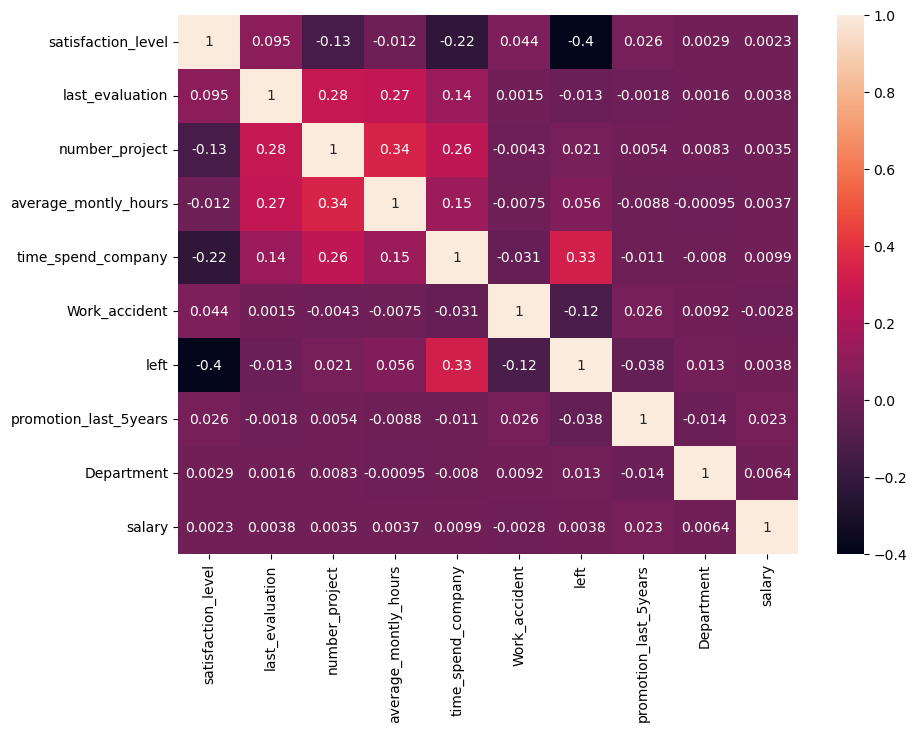

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_mat,annot=True)

In [32]:
y=hr_df['left']
X=hr_df.drop('left',axis=1)

scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[-1.05392566, -1.10927923, -1.53422898, ..., -0.12094786,
         0.38493875, -0.57114708],
       [-2.18338218,  0.97918221,  2.76076601, ..., -0.12094786,
         0.38493875,  1.0354019 ],
       [ 0.36835291,  0.91951189,  1.04276802, ..., -0.12094786,
         0.38493875, -0.57114708],
       ...,
       [-1.8487284 ,  0.44214927,  0.18376902, ..., -0.12094786,
         0.04104987,  1.0354019 ],
       [-0.04996432,  0.80017123, -0.67522998, ..., -0.12094786,
        -2.02228343,  1.0354019 ],
       [-0.55194499,  0.08412731,  0.18376902, ..., -0.12094786,
        -2.02228343, -0.57114708]])

# Task 3

**Naive Bayes**

In [33]:
X_train, X_test,y_train, y_test=train_test_split(scaled_X,y,test_size=0.3,random_state=42)

In [34]:
model=GaussianNB().fit(X_train,y_train)
y_pred=model.predict(X_test)


In [35]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [36]:
model.score(X_test,y_test)

0.8666069829901522

In [37]:
model.score(X_train,y_train)

0.8703940634595702

In [38]:
print(accuracy_score(y_test,y_pred))

0.8666069829901522


In [39]:
print(precision_score(y_test,y_pred))

0.5951742627345844


In [40]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2460  302]
 [ 145  444]]


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2762
           1       0.60      0.75      0.67       589

    accuracy                           0.87      3351
   macro avg       0.77      0.82      0.79      3351
weighted avg       0.88      0.87      0.87      3351



In [42]:
# accuracy of 86 and precision 59 on the test data.

Text(120.72222222222221, 0.5, 'predicted')

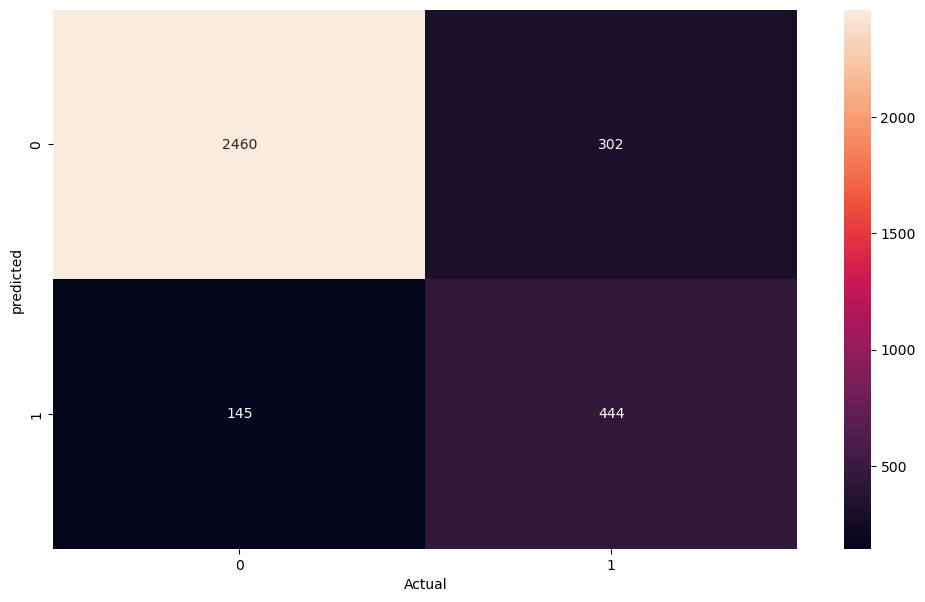

In [43]:
plt.figure(figsize=(12,7))
sns.heatmap(cm,annot=True,fmt='d') # fmt formatting
plt.xlabel("Actual")
plt.ylabel("predicted")

# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
de_model=DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

In [84]:
y_pred=de_model.predict(X_test)

In [47]:
print(accuracy_score(y_test,y_pred))

0.9749328558639212


In [48]:
print(precision_score(y_test,y_pred))

0.9258010118043845


In [49]:
de_model.score(X_test,y_test)

0.9749328558639212

In [50]:
de_model.score(X_train,y_train)

0.9722364380757421

In [51]:
# accuracy of 97 and precisiob 92 on the test data

In [52]:
cdm=confusion_matrix(y_test,y_pred)
print(cdm)

[[2718   44]
 [  40  549]]


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2762
           1       0.93      0.93      0.93       589

    accuracy                           0.97      3351
   macro avg       0.96      0.96      0.96      3351
weighted avg       0.98      0.97      0.97      3351



In [85]:
from sklearn import tree

[Text(0.5, 0.875, 'satisfaction_level <= -0.698\ngini = 0.276\nsamples = 7816\nvalue = [6523, 1293]\nclass = y[0]'),
 Text(0.25, 0.625, 'number_project <= -1.105\ngini = 0.498\nsamples = 1823\nvalue = [854, 969]\nclass = y[1]'),
 Text(0.125, 0.375, 'last_evaluation <= -0.841\ngini = 0.292\nsamples = 704\nvalue = [125, 579]\nclass = y[1]'),
 Text(0.0625, 0.125, 'gini = 0.152\nsamples = 626\nvalue = [52, 574]\nclass = y[1]'),
 Text(0.1875, 0.125, 'gini = 0.12\nsamples = 78\nvalue = [73, 5]\nclass = y[0]'),
 Text(0.375, 0.375, 'satisfaction_level <= -2.162\ngini = 0.454\nsamples = 1119\nvalue = [729, 390]\nclass = y[0]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 345\nvalue = [0, 345]\nclass = y[1]'),
 Text(0.4375, 0.125, 'gini = 0.11\nsamples = 774\nvalue = [729, 45]\nclass = y[0]'),
 Text(0.75, 0.625, 'time_spend_company <= 1.547\ngini = 0.102\nsamples = 5993\nvalue = [5669, 324]\nclass = y[0]'),
 Text(0.625, 0.375, 'average_montly_hours <= 1.881\ngini = 0.019\nsamples = 5509\nvalue =

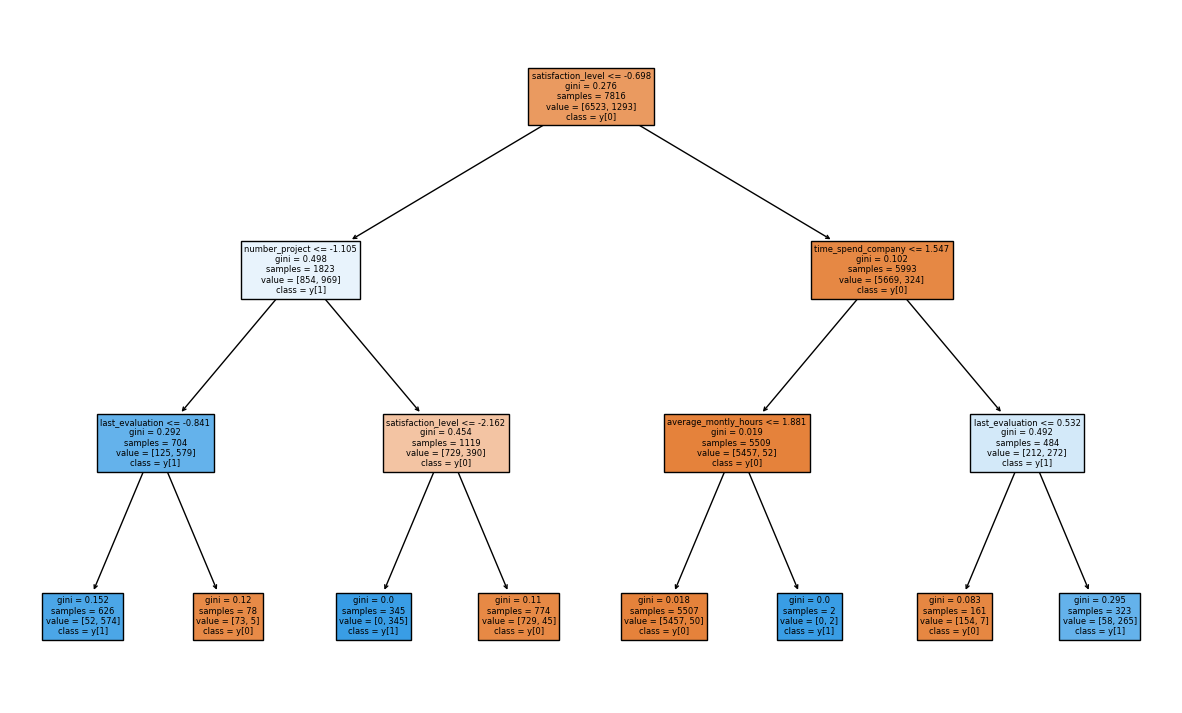

In [87]:
plt.figure(figsize=(15,9))
tree.plot_tree(de_model,filled=True,feature_names=hr_df.columns,class_names=True)

In [56]:
# sample values 
# gini index computed at each level
# how many values in the
# colors represents class  
# in the root box, based on the criteria for statis faction level , giniindex
# have been calulated on the no. of samples and divided into 2 class 
# gini 0 : pure node

**Logistic Regression**

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_model=LogisticRegression().fit(X_train,y_train)

In [59]:
y_pred=log_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [60]:
print("score: ", model.score(X_train,y_train))

score:  0.8703940634595702


In [61]:
#model evaluation for classification
clm=confusion_matrix(y_test,y_pred).ravel()

print(clm)

[2613  149  457  132]


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2762
           1       0.47      0.22      0.30       589

    accuracy                           0.82      3351
   macro avg       0.66      0.59      0.60      3351
weighted avg       0.78      0.82      0.79      3351



In [63]:
print(accuracy_score(y_test,y_pred))

0.8191584601611459


In [64]:
print(precision_score(y_test,y_pred))

0.4697508896797153


In [65]:
log_model.score(X_test,y_test)

0.8191584601611459

In [66]:
log_model.score(X_train,y_train)

0.8281729785056294

In [67]:
# the accuracy score of logistic model is 81% with precision 46% on the test data

# Task 5

In [68]:
from sklearn.metrics import roc_auc_score,roc_curve

**Naive Bayes**

In [69]:
#roc curve(log)
#auc curve(r_prob)
log_prob=model.predict_proba(X_test)
log_prob=log_prob[:,1]
r_prob=[0 for _ in range(len(y_test))]

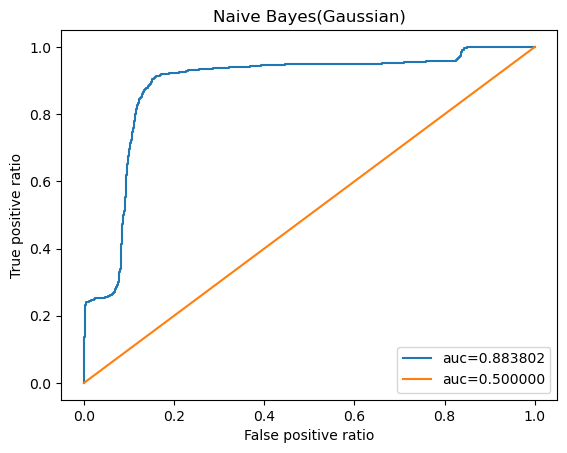

In [70]:
#tpr(true pos. rate/sensitivity)
#fpr(false pos. rate)
fpr,tpr,threshold=roc_curve(y_test,log_prob)
auc=roc_auc_score(y_test,log_prob)
r_fpr,r_tpr,threshold=roc_curve(y_test,r_prob)
r_auc=roc_auc_score(y_test,r_prob)
plt.plot(fpr,tpr,label="auc={:2f}".format(auc))
plt.plot(r_fpr,r_tpr,label="auc={:2f}".format(r_auc))
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('Naive Bayes(Gaussian)')
plt.legend()
plt.show()

 An ROC-AUC Curve which shows the fit for the Navie Bayes model.

**Decision Tree**

In [71]:
#roc curve(log)
#auc curve(r_prob)
log_prob=de_model.predict_proba(X_test)
log_prob=log_prob[:,1]
r_prob=[0 for _ in range(len(y_test))]

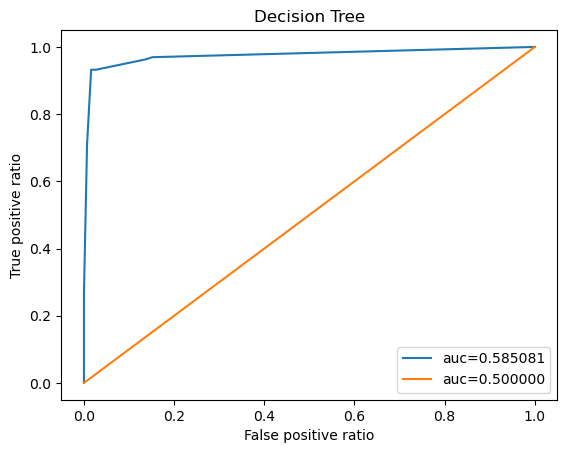

In [72]:
fpr,tpr,threshold=roc_curve(y_test,log_prob)
auc=roc_auc_score(y_test,y_pred)
r_fpr,r_tpr,threshold=roc_curve(y_test,r_prob)
r_auc=roc_auc_score(y_test,r_prob)
plt.plot(fpr,tpr,label="auc={:2f}".format(auc))
plt.plot(r_fpr,r_tpr,label="auc={:2f}".format(r_auc))
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('Decision Tree')
plt.legend()
plt.show()

 An ROC-AUC Curve which shows the fit for the Decision Tree model.

**Logistic Regression**

In [74]:
#roc curve(log)
#auc curve(r_prob)
log_prob=log_model.predict_proba(X_test)
log_prob=log_prob[:,1]
r_prob=[0 for _ in range(len(y_test))]

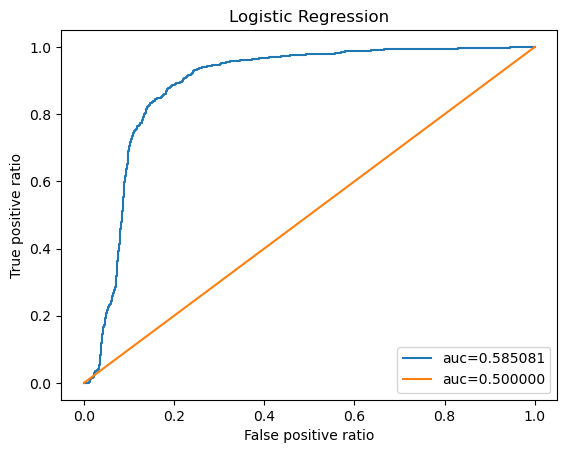

In [75]:
#tpr(true pos. rate/sensitivity)
#fpr(false pos. rate)
fpr,tpr,threshold=roc_curve(y_test,log_prob)
auc=roc_auc_score(y_test,y_pred)
r_fpr,r_tpr,threshold=roc_curve(y_test,r_prob)
r_auc=roc_auc_score(y_test,r_prob)
plt.plot(fpr,tpr,label="auc={:2f}".format(auc))
plt.plot(r_fpr,r_tpr,label="auc={:2f}".format(r_auc))
plt.title('Logistic Regression')
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.legend()
plt.show()

 An ROC-AUC Curve which shows the fit for the Logistic Regression model.

**Decision Tree** seems to be the best model here.

on the basis of the accuracy and precision score of the test data and the auc/roc curve confirms the model.